In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
print('version of tensorflow {}'.format(tf.__version__))

version of tensorflow 2.13.0


In [4]:
print(f"version of keras {tf.keras.__version__}")

AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [5]:
os.getcwd()

'/home/jovyan/work'

In [6]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
tf.config.list_physical_devices("GPU")

[]

In [8]:
list_device=['CPU','GPU']
for i in list_device:
    output=tf.config.list_physical_devices(i)
    if len(output)>0:
        print(f"{i} is available")
        print(f"details are {output}")
    else:
        print(f"{i} is not available")

CPU is available
details are [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is not available


## Creating a simple classifier using keras on MNIST data

In [9]:
mnist=tf.keras.datasets.mnist

In [10]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [11]:
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [12]:
x_train_full.shape

(60000, 28, 28)

## mnist dataset contain handwritten numbers from 1-9 in the form of square matrix
## x_train_full contains 60000 images,each image contain 28*28 elements,in this case elements ranges from 0-255

In [70]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
# create a validation data set from the full training data
# scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range

x_valid,x_train=x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

# scale the test set as well
x_test=x_test/255.

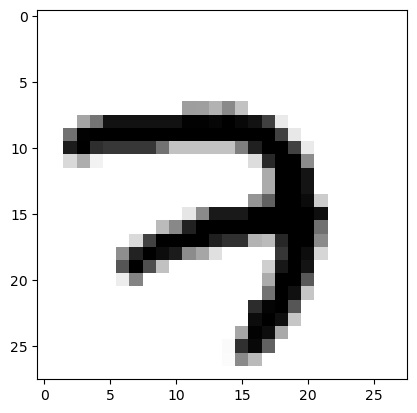

In [15]:
plt.imshow(x_train[0],cmap='binary')

<AxesSubplot: >

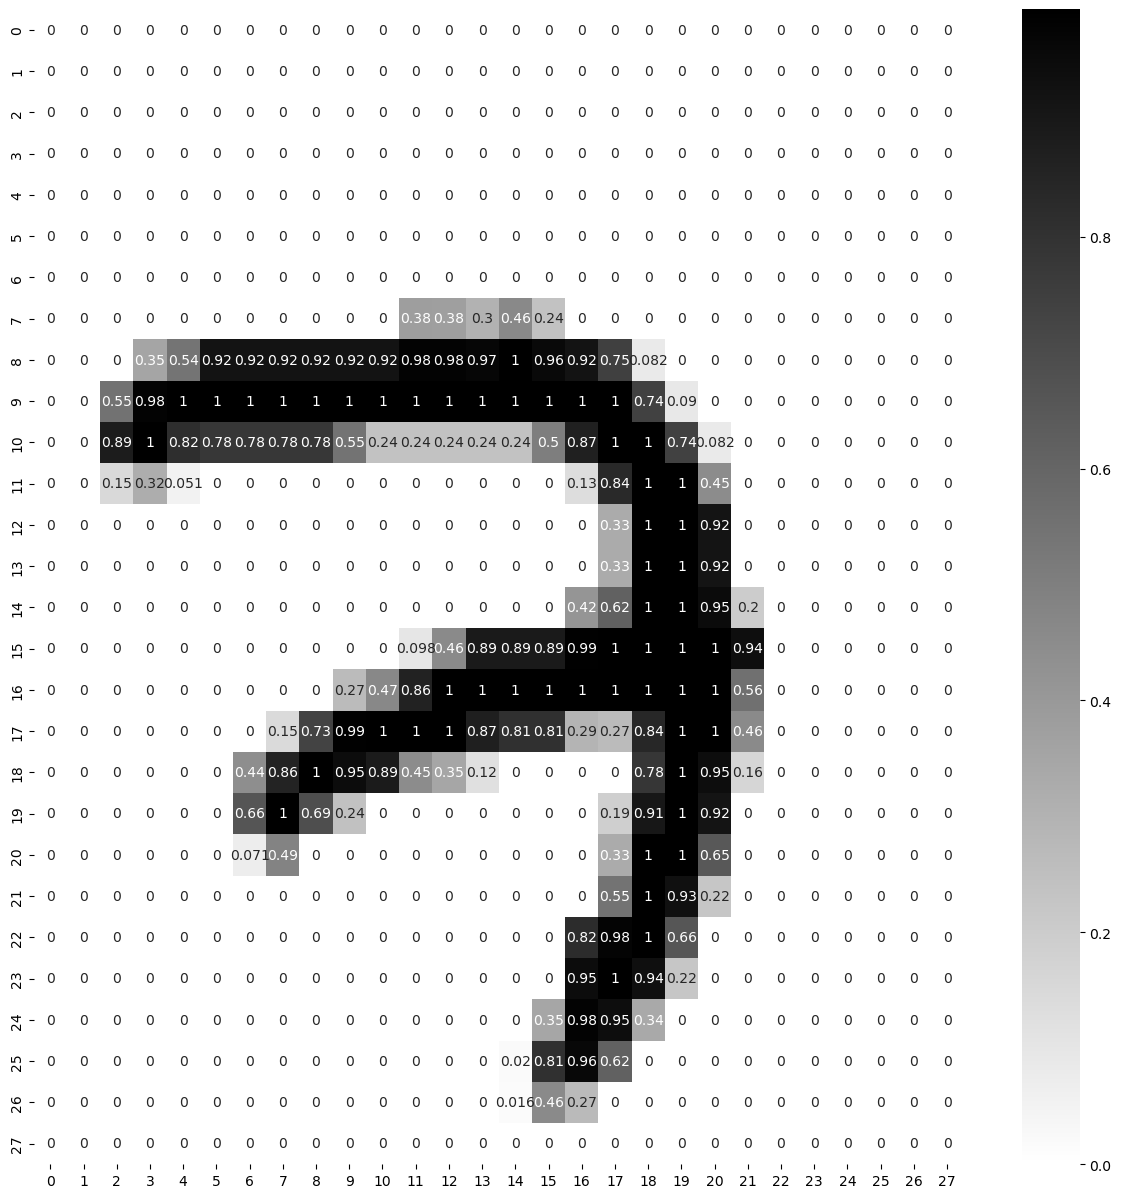

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],annot=True,cmap='binary')

In [17]:
28*28

784

# means there are 784 inputs which will go to the first hidden layer which contains 300 neurons.
# now the next hidden layer contains 100 neurons,each neuron will take 300 inputs
# the output of this model will range 0-9 
# so its a multi-class classification,we will use softmax function in last and we can use any activation function in hidden layers 
# now we will flatten the input

In [19]:
Layers=[tf.keras.layers.Flatten(input_shape=(28,28),name="inputlayer"),
       tf.keras.layers.Dense(units=300,activation='relu',name="hiddenlayer1"),
       tf.keras.layers.Dense(units=100,activation='relu',name="hiddenlayer2"),
       tf.keras.layers.Dense(units=10,activation='softmax',name='outputlayer') 
       ]
model=tf.keras.models.Sequential(Layers)

In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
## hiddellayer1-->784*300+300
## hiddenlayer2-->300*100+100
## outputlayer-->100*10+10
## these parameters will be trained

In [25]:
[784*300+300,
300*100+100,
100*10+10]

[235500, 30100, 1010]

In [29]:
layer=model.layers[0]

In [30]:
layer.name

'inputlayer'

In [31]:
layer.get_weights()

[]

In [32]:
layer=model.layers[1]

In [33]:
layer.name

'hiddenlayer1'

In [37]:
layer.get_weights()

[array([[-0.0389235 ,  0.02686091,  0.05984557, ...,  0.05412698,
          0.06158487, -0.02646119],
        [-0.05039243, -0.07170881, -0.04262841, ..., -0.01131461,
         -0.03847821,  0.05764987],
        [ 0.02086465, -0.05453242, -0.06168014, ...,  0.02902225,
         -0.02046172,  0.00829798],
        ...,
        [-0.04908541, -0.04057484, -0.01539145, ...,  0.0675554 ,
          0.00458994, -0.0009461 ],
        [ 0.0485868 ,  0.0615066 , -0.03597489, ..., -0.07343936,
          0.00480304,  0.05462363],
        [-0.02649221, -0.0728318 ,  0.02261793, ..., -0.02831494,
         -0.06630167,  0.01845794]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

# upper array contains weight
# lower array contains bias

In [41]:
# lets check weight
layer.get_weights()[0].shape

(784, 300)

## 784*300 are the weights for hiddenlayer1

In [42]:
# lets check bias
layer.get_weights()[1].shape

(300,)

## 300 are bias for hiddenlayer1

## similarily for hidden layer2 also and output layer also

# now we will train our model

In [46]:
loss_function='sparse_categorical_crossentropy'  ## we can also give like->tf.losses.sparse_categorical_crossentropy
optimizer='SGD'  ## tf.keras.optimizers.SGD(0.02)
metrics='accuracy'

model.compile(optimizer=optimizer,loss=loss_function,metrics=metrics)

In [47]:
## training model

epochs=30
validation_set=(x_valid,y_valid)

trained_model=model.fit(x_train,y_train,epochs=epochs,validation_data=validation_set,batch_size=32)



Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6288 - accuracy: 0.8359 - val_loss: 0.3099 - val_accuracy: 0.9116
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2907 - accuracy: 0.9173 - val_loss: 0.2559 - val_accuracy: 0.9308
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2368 - accuracy: 0.9331 - val_loss: 0.2054 - val_accuracy: 0.9412
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2011 - accuracy: 0.9427 - val_loss: 0.1756 - val_accuracy: 0.9508
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1744 - accuracy: 0.9508 - val_loss: 0.1595 - val_accuracy: 0.9538
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9565 - val_loss: 0.1462 - val_accuracy: 0.9598
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1372 - accuracy: 0.9613 - val_loss: 0.1297 - val_accuracy:

In [48]:
trained_model.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [50]:
pd.DataFrame(trained_model.history)

,loss,accuracy,val_loss,val_accuracy
0,0.628840,0.835855,0.309879,0.9116
1,0.290744,0.917255,0.255920,0.9308
2,0.236774,0.933145,0.205448,0.9412
3,0.201110,0.942727,0.175603,0.9508
4,0.174436,0.950764,0.159511,0.9538
5,0.153892,0.956455,0.146240,0.9598
6,0.137214,0.961309,0.129726,0.9642
7,0.123568,0.965164,0.119879,0.9670
8,0.111990,0.968927,0.113701,0.9676
9,0.101890,0.971564,0.107508,0.9704


<AxesSubplot: >

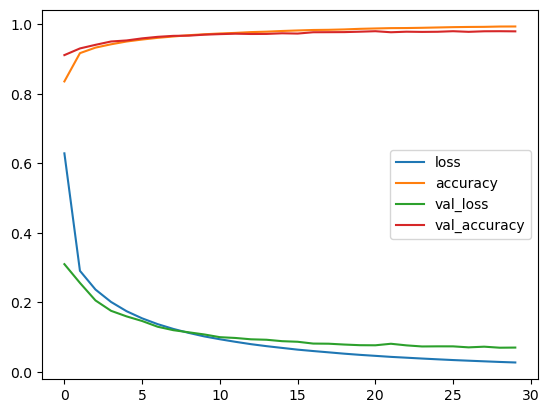

In [51]:
pd.DataFrame(trained_model.history).plot()

In [64]:
## lets evaluate our model
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9787


[0.07066892832517624, 0.9786999821662903]

In [58]:
#lets test out model by giving input
x_input=x_test[:3]

In [59]:
y_actual=y_test[:3]

In [60]:
y_actual

array([7, 2, 1], dtype=uint8)

In [66]:
y_pred=model.predict(x_input)

1/1 [==============================] - 0s 26ms/step


In [68]:
y_pred.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)